# All Space Missions from 1957🚀

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define the file path
file_path = 'data/space.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [4]:
# Checking the structure of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


## 01 What is the distribution of missions by company?

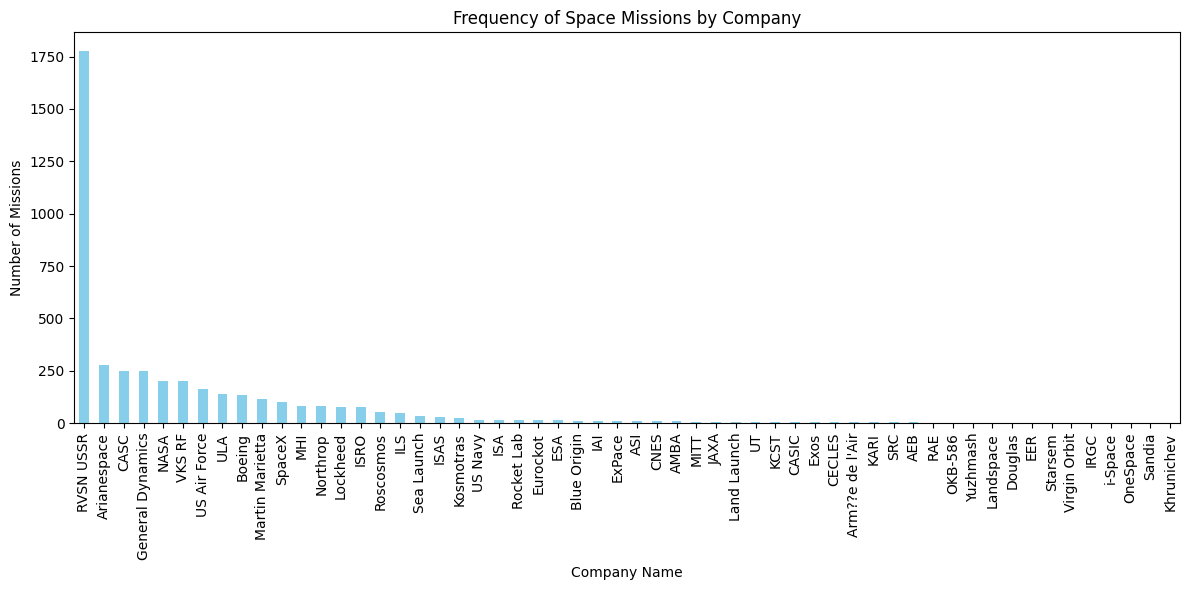

In [6]:

# Group the data by 'Company Name' and count the number of missions for each company
company_mission_counts = df['Company Name'].value_counts()

# Plot the data
plt.figure(figsize=(12, 6))
company_mission_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Space Missions by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Missions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

## 02 Where are most space missions launched from?

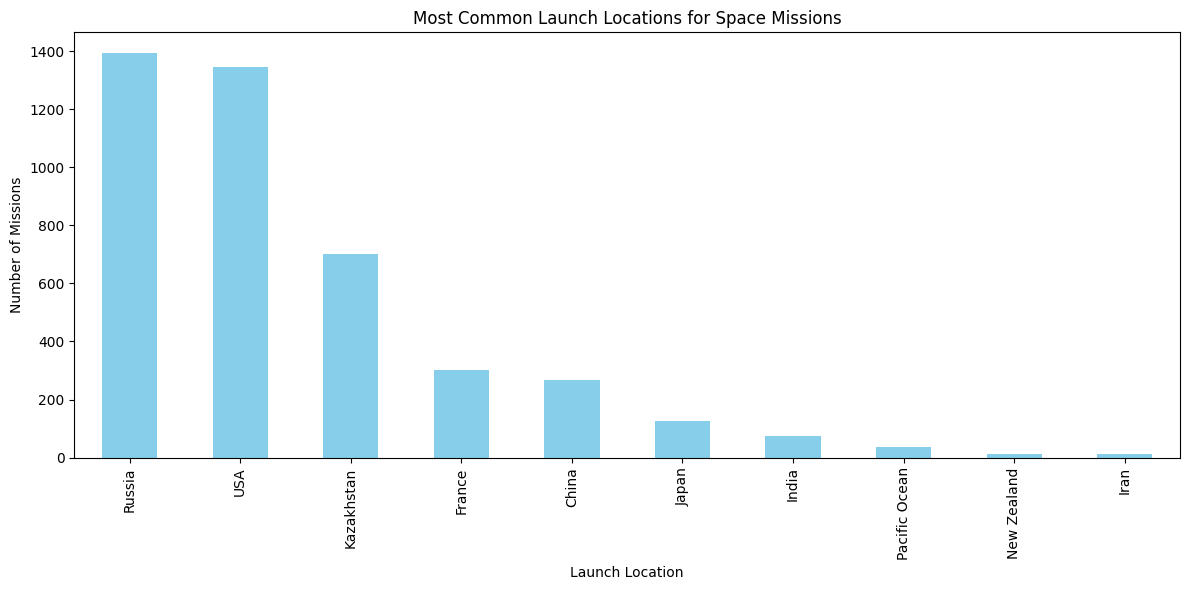

In [8]:
# Extract the 'Location' column
locations = df['Location']

# Split the 'Location' values to extract the launch locations
# Assuming the location format is consistent (e.g., City, State, Country)
launch_locations = locations.str.split(',').str[-1].str.strip()

# Count the number of missions from each launch location
location_counts = launch_locations.value_counts()

# Plot the data
plt.figure(figsize=(12, 6))
location_counts.head(10).plot(kind='bar', color='skyblue')  # Display the top 10 locations
plt.title('Most Common Launch Locations for Space Missions')
plt.xlabel('Launch Location')
plt.ylabel('Number of Missions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

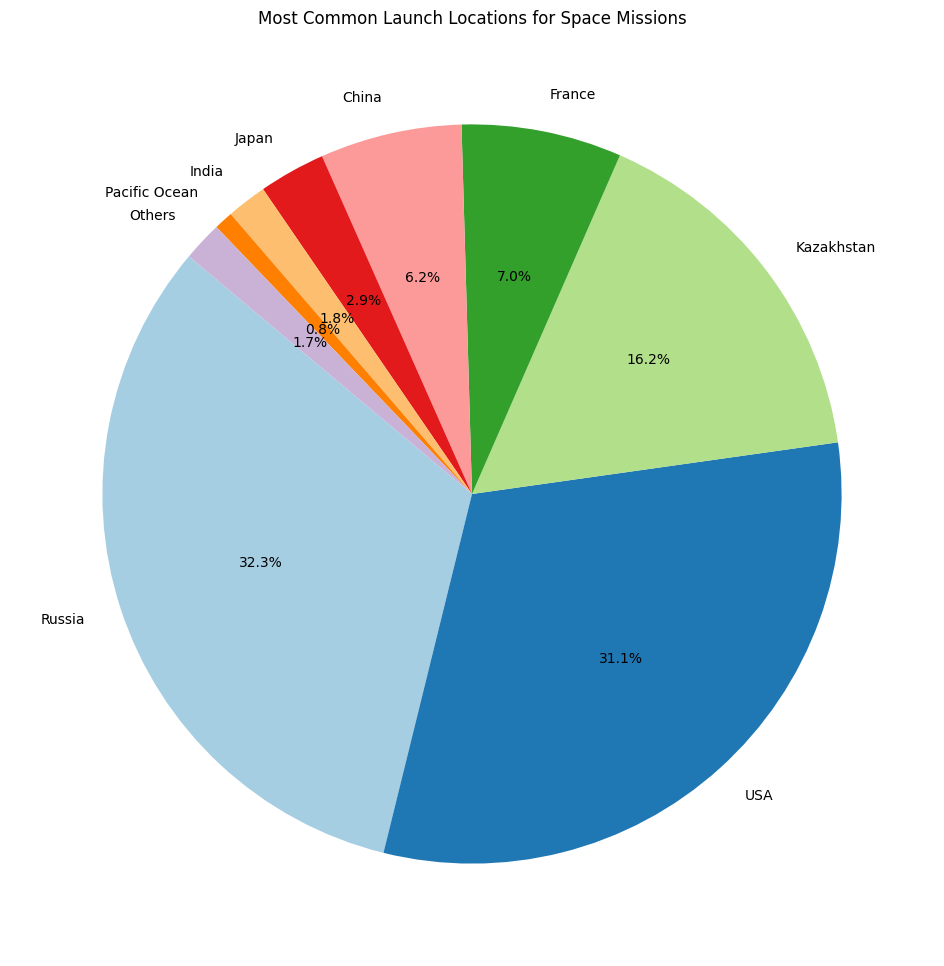

In [12]:
# Select the top 8 locations and group the rest as 'Others'
top_8_locations = location_counts.head(8)
other_locations_count = location_counts[8:].sum()
top_8_locations['Others'] = other_locations_count

# Create a pie chart
plt.figure(figsize=(12, 12))
plt.pie(top_8_locations, labels=top_8_locations.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(top_8_locations.index))))
plt.title('Most Common Launch Locations for Space Missions')

# Display the plot
plt.show()

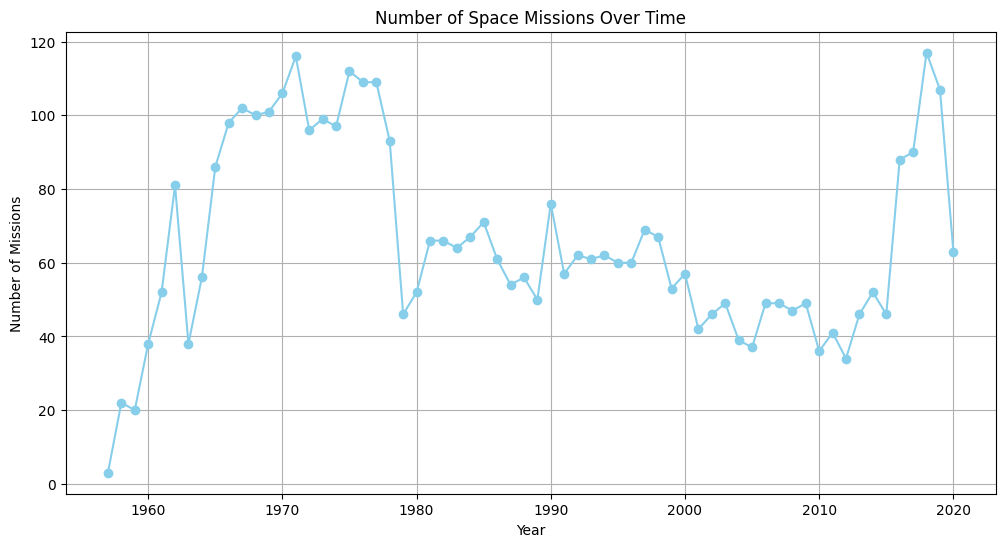

In [15]:
# Convert the 'Datum' column to a datetime object with a specified format
df['Datum'] = pd.to_datetime(df['Datum'], format='%a %b %d, %Y %H:%M %Z', errors='coerce')

# Extract the year from the 'Datum' column
df['Year'] = df['Datum'].dt.year

# Group the data by year and count the number of missions for each year
missions_by_year = df['Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
missions_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Space Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.grid(True)

# Display the plot
plt.show()